In [102]:
!pip install openpyx1
!pip install xlrd

ERROR: Could not find a version that satisfies the requirement openpyx1 (from versions: none)
ERROR: No matching distribution found for openpyx1


In [103]:
import pandas as pd
df = pd.read_excel("/home/samyak/Downloads/GSAF5.xls")

In [104]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [105]:
df

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-03-10 00:00:00,2025.0,Unprovoked,Australia,WA,Duke of Orleans Bay,Surfing,Steven Jeffrey Payne,M,37,...,Great White Shark,Bob Myatt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-03-07 00:00:00,2025.0,Unprovoked,Australia,NSW,Gunyah beach Bundeena Port Hacking,Swimming,Mangyong Zhang,F,56,...,Bull shark,Bob Myatt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-02-27 00:00:00,2025.0,Unprovoked,Australia,Victoria,Nuns Beach near Portland,Swimming,Robbie Houlihan,M,40+,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27-Feb-25,2025.0,Questionable,Philippines,Batangas Resort,Verde Island,SCUBA Diving,Illia Peregudin,M,29,...,Not stated,Stephen Parkhill Glen Folkard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-02-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Blasck Wall Reach Swan River Perth,Kayaking,Georgina Smith,F,35,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
7004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
7005,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
7006,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [106]:
# Null values
df.isnull().any()

Date              False
Year               True
Type               True
Country            True
State              True
Location           True
Activity           True
Name               True
Sex                True
Age                True
Injury             True
Fatal Y/N          True
Time               True
Species            True
Source             True
pdf                True
href formula       True
href               True
Case Number        True
Case Number.1      True
original order     True
Unnamed: 21        True
Unnamed: 22        True
dtype: bool

In [107]:
# Null values
# 1. Remove colums we don't need and keep only 5 columns
# 2. Remove rows where all values are null.
# 3. THRESHOLD TO DECIDE. Remove all rows in which there is at least 1 null value.

In [108]:
df_columns = df.drop(['Year', 'State', 'Location', 'Activity', 'Name', 'Age', 'Injury', 
         'Fatal Y/N', 'Time', 'Source', 'pdf', 'href formula', 
         'href', 'Case Number', 'Case Number.1', 'original order', 
         'Unnamed: 21', 'Unnamed: 22'], axis=1, inplace=True)

df

,Date,Type,Country,Sex,Species
0,2025-03-10 00:00:00,Unprovoked,Australia,M,Great White Shark
1,2025-03-07 00:00:00,Unprovoked,Australia,F,Bull shark
2,2025-02-27 00:00:00,Unprovoked,Australia,M,Not stated
3,27-Feb-25,Questionable,Philippines,M,Not stated
4,2025-02-22 00:00:00,Unprovoked,Australia,F,Not stated
...,...,...,...,...,...
7003,Before 1903,Unprovoked,AUSTRALIA,M,NaN
7004,Before 1903,Unprovoked,AUSTRALIA,M,NaN
7005,1900-1905,Unprovoked,USA,M,NaN
7006,1883-1889,Unprovoked,PANAMA,M,NaN


In [109]:
# 2. Remove rows where all values are null.
# 3. Remove all rows in which there is at least 1 null value. No threshold.
df.dropna()

,Date,Type,Country,Sex,Species
0,2025-03-10 00:00:00,Unprovoked,Australia,M,Great White Shark
1,2025-03-07 00:00:00,Unprovoked,Australia,F,Bull shark
2,2025-02-27 00:00:00,Unprovoked,Australia,M,Not stated
3,27-Feb-25,Questionable,Philippines,M,Not stated
4,2025-02-22 00:00:00,Unprovoked,Australia,F,Not stated
...,...,...,...,...,...
6982,Early 1930s,Unprovoked,BELIZE,M,12' tiger shark
6999,Before 1906,Unprovoked,AUSTRALIA,M,Blue pointer
7000,Before 1906,Unprovoked,AUSTRALIA,M,Blue pointer
7001,Before 1906,Unprovoked,AUSTRALIA,M,Blue pointers


In [110]:
# dropna() removes rows where any value is NaN (null). We have now 0 null values.

In [111]:
### Manipulating strings with RegEx.

In [112]:
# =========================
# Convert 'Date' Columns to Datetime Format
# =========================

# Convert the 'Date' column in the stock dataset to datetime format
# 'errors="coerce"' will handle invalid parsing by converting them to NaT (Not a Time)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.date

In [113]:
df

,Date,Type,Country,Sex,Species
0,2025-03-10,Unprovoked,Australia,M,Great White Shark
1,2025-03-07,Unprovoked,Australia,F,Bull shark
2,2025-02-27,Unprovoked,Australia,M,Not stated
3,2025-02-27,Questionable,Philippines,M,Not stated
4,2025-02-22,Unprovoked,Australia,F,Not stated
...,...,...,...,...,...
7003,NaT,Unprovoked,AUSTRALIA,M,NaN
7004,NaT,Unprovoked,AUSTRALIA,M,NaN
7005,NaT,Unprovoked,USA,M,NaN
7006,NaT,Unprovoked,PANAMA,M,NaN


In [114]:
df.dropna()

,Date,Type,Country,Sex,Species
0,2025-03-10,Unprovoked,Australia,M,Great White Shark
1,2025-03-07,Unprovoked,Australia,F,Bull shark
2,2025-02-27,Unprovoked,Australia,M,Not stated
3,2025-02-27,Questionable,Philippines,M,Not stated
4,2025-02-22,Unprovoked,Australia,F,Not stated
...,...,...,...,...,...
6816,1812-05-01,Unprovoked,ENGLAND,M,Thought to involve a porbeagle or mako shark
6824,1805-09-01,Invalid,USA,M,Shark involvement prior to death unconfirmed
6845,1767-01-01,Invalid,FRANCE,M,Description of shark does not ring true
6847,1970-01-01,Unprovoked,MEDITERRANEAN SEA,M,"""The fish was harpooned, dried, and presented ..."


In [115]:
df.columns

Index(['Date', 'Type', 'Country', 'Sex', 'Species '], dtype='object')

In [116]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      6133 non-null   object
 1   Type      6990 non-null   object
 2   Country   6958 non-null   object
 3   Sex       6429 non-null   object
 4   Species   3876 non-null   object
dtypes: object(5)
memory usage: 273.9+ KB


In [117]:
df.rename(columns= {'Species ': 'Species'}, inplace=True)
print(df.columns)

Index(['Date', 'Type', 'Country', 'Sex', 'Species'], dtype='object')


In [118]:
unique_species = df["Species"].unique()
print(unique_species)

['Great White Shark' 'Bull shark' 'Not stated' ... "12' tiger shark"
 'Blue pointers'
 'Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable']


In [119]:
df["Species"] = df["Species"].apply(lambda x:x.lower() if type(x) == str else x)

In [120]:
df

,Date,Type,Country,Sex,Species
0,2025-03-10,Unprovoked,Australia,M,great white shark
1,2025-03-07,Unprovoked,Australia,F,bull shark
2,2025-02-27,Unprovoked,Australia,M,not stated
3,2025-02-27,Questionable,Philippines,M,not stated
4,2025-02-22,Unprovoked,Australia,F,not stated
...,...,...,...,...,...
7003,NaT,Unprovoked,AUSTRALIA,M,NaN
7004,NaT,Unprovoked,AUSTRALIA,M,NaN
7005,NaT,Unprovoked,USA,M,NaN
7006,NaT,Unprovoked,PANAMA,M,NaN


In [121]:
def change_bull(x):
    if type(x) == str and "bull" in x.lower():
        return "bull shark"
    else:
        return x

In [122]:
df["Species"] = df["Species"].apply(change_bull)

In [123]:
def change_blacktip(x):
    if type(x) == str and "blacktip" in x.lower():
        return "blacktip shark"
    else:
        return x

In [124]:
df["Species"] = df["Species"].apply(change_blacktip)

In [125]:
def change_bronze_into_copper(x):
    if type(x) == str and "bronze" in x.lower():
        return "copper shark"
    else:
        return x

In [126]:
df["Species"] = df["Species"].apply(change_bronze_into_copper)

In [127]:
def change_copper(x):
    if type(x) == str and "copper" in x.lower():
        return "copper shark"
    else:
        return x

In [128]:
df["Species"] = df["Species"].apply(change_copper)

In [129]:
def change_white(x):
    if type(x) == str and "white" in x.lower():
        return "white shark"
    else:
        return x

In [130]:
df["Species"] = df["Species"].apply(change_white)

In [131]:
def change_caribbean_reef(x):
    if type(x) == str and "caribbean" in x.lower():
        return "caribbean reef shark"
    else:
        return x

In [132]:
df["Species"] = df["Species"].apply(change_caribbean_reef)

In [133]:
def change_galapagos(x):
    if type(x) == str and "galapagos" in x.lower():
        return "galapagos shark"
    else:
        return x

In [134]:
df["Species"] = df["Species"].apply(change_galapagos)

In [135]:
def change_lemon(x):
    if type(x) == str and "lemon" in x.lower():
        return "lemon shark"
    else:
        return x

In [136]:
df["Species"] = df["Species"].apply(change_lemon)

In [137]:
def change_mako(x):
    if type(x) == str and "mako" in x.lower():
        return "mako shark"
    else:
        return x

In [138]:
df["Species"] = df["Species"].apply(change_mako)

In [139]:
def change_nurse(x):
    if type(x) == str and "nurse" in x.lower():
        return "nurse shark"
    else:
        return x

In [140]:
df["Species"] = df["Species"].apply(change_nurse)

In [141]:
def change_oceanic_whitetip(x):
    if type(x) == str and "oceanic whitetip" in x.lower():
        return "oceanic whitetip shark"
    else:
        return x

In [142]:
df["Species"] = df["Species"].apply(change_oceanic_whitetip)

In [143]:
def change_whitetip_reef(x):
    if type(x) == str and "whitetip reef" in x.lower():
        return "whitetip reef shark"
    else:
        return x

In [144]:
df["Species"] = df["Species"].apply(change_whitetip_reef)

In [145]:
def change_raggedtooth(x):
    if type(x) == str and "raggedtooth" in x.lower():
        return "raggedtooth shark (sand tiger shark)"
    else:
        return x

In [146]:
df["Species"] = df["Species"].apply(change_raggedtooth)

In [147]:
def change_sand_tiger(x):
    if type(x) == str and "sand tiger" in x.lower():
        return "raggedtooth shark (sand tiger shark)"
    else:
        return x

In [148]:
df["Species"] = df["Species"].apply(change_sand_tiger)

In [149]:
def change_sandbar(x):
    if type(x) == str and "sandbar" in x.lower():
        return "sandbar shark"
    else:
        return x

In [150]:
df["Species"] = df["Species"].apply(change_sandbar)

In [151]:
def change_broadnose(x):
    if type(x) == str and "broadnose" in x.lower():
        return "broadnose sevengill shark"
    else:
        return x

In [152]:
df["Species"] = df["Species"].apply(change_broadnose)

In [153]:
def change_sevengill(x):
    if type(x) == str and "sevengill" in x.lower():
        return "broadnose sevengill shark"
    else:
        return x

In [154]:
df["Species"] = df["Species"].apply(change_sevengill)

In [155]:
def change_7gill(x):
    if type(x) == str and "7-gill" in x.lower():
        return "broadnose sevengill shark"
    else:
        return x

In [156]:
df["Species"] = df["Species"].apply(change_7gill)

In [157]:
def change_tiger(x):
    if type(x) == str and "tiger" in x.lower():
        return "tiger shark"
    else:
        return x

In [158]:
df["Species"] = df["Species"].apply(change_tiger)

In [159]:
def change_hammerhead(x):
    if type(x) == str and "hammerhead" in x.lower():
        return "hammerhead shark"
    else:
        return x

In [160]:
df["Species"] = df["Species"].apply(change_hammerhead)

In [161]:
def change_spinner(x):
    if type(x) == str and "spinner" in x.lower():
        return "spinner shark"
    else:
        return x

In [162]:
df["Species"] = df["Species"].apply(change_spinner)

In [163]:
def change_thresher(x):
    if type(x) == str and "thresher" in x.lower():
        return "thresher shark"
    else:
        return x

In [164]:
df["Species"] = df["Species"].apply(change_thresher)

In [165]:
def change_blue(x):
    if type(x) == str and "blue" in x.lower():
        return "blue shark"
    else:
        return x

In [166]:
df["Species"] = df["Species"].apply(change_blue)

In [167]:
len(df["Species"].unique())

634

In [168]:
df["Species"].unique()

array(['white shark', 'bull shark', 'not stated', 'not stated ',
       'mako shark', 'copper shark',
       'described as a large terrifying animal', 'unknown', 'tiger shark',
       'unknown ', '1m shark species unknown', 'reef shark 6ft (1.8m)',
       'undetermined small shall shark', 'blacktip shark',
       'not specified', '6 ft shark', '6ft shark', 'large shark',
       '2.5m shark', 'sandbar shark', 'carribean reef shark 7ft',
       "3' to 4' shark", nan, 'broze whaler?',
       'broadnose sevengill shark', 'shark involment not confirmed',
       'lemon shark', 'nurse shark', 'galapagos shark',
       'cookiecutter sharks', 'blue shark', 'wfite shark',
       'wobbegong shark', "8' shark", "4' shark", "3' shark",
       'caribbean reef shark', 'grey reef shark, 2 m',
       'shark involvement not confirmes', '18" - 23" horn shark',
       '1m shark', 'authorities report injury caused bya barracuda',
       '5m to 6m shark', 'a small shark', "5'shark", '3m shark', 'bu.ll',
   

In [169]:
df["Species"].value_counts()

Species
white shark                                                                                                                                                      742
tiger shark                                                                                                                                                      371
bull shark                                                                                                                                                       239
blacktip shark                                                                                                                                                   133
nurse shark                                                                                                                                                      111
                                                                                                                                                                ... 
c.

In [170]:
# Define the list of standardized species names
standard_species = [
    "blacktip shark",
    "copper shark",
    "bull shark",
    "white shark",
    "caribbean reef shark",
    "galapagos shark",
    "lemon shark",
    "mako shark",
    "nurse shark",
    "oceanic whitetip shark",
    "whitetip reef shark",
    "raggedtooth shark (sand tiger shark)",
    "sandbar shark",
    "broadnose sevengill shark",
    "tiger shark",
    "hammerhead shark",
    "spinner shark",
    "thresher shark",
    "blue shark"
]

# Filter rows where "Species" is NOT in the standardized list
filtered_df_not_standardized_species = df[~df["Species"].str.lower().isin([s.lower() for s in standard_species])]

# Show the unique non-standardized species values
unique_non_standard_species = filtered_df_not_standardized_species["Species"].dropna().unique()

# Print the result
print(sorted(unique_non_standard_species))

[' ', '  ', ' "gummy" shark (rhizoprionodon or loxodon) 1.2 m [4\']', " 1.5 m [5'] dusky shark", " 6' to 8' shark", ' a small shark', ' reef shark, 1.8m', ' wobbegong shark, 1.6 to 1.8m ', '"a 2\' (0.6 m) brown shark"', '"a black-tipped shark"', '"a dog shark"', '"a large shark"', '"a little shark"', '"a long thin brown-colored shark"', '"a pack of 6 sharks"', '"a pack of sharks"', '"a school of sharks"', '"a small shark"', '"a very large shark"', '"a young shark"', '"attacked by a number of sharks"', '"black tipped" shark', '"dog shark"', '"gray shark"', '"grey shark"', '"grey-colored shark"', '"juvenile shark"', '"reef shark"', '"sand shark"', '"sand" shark', '"sandshark"', '"shark caught later"', '"shark had a very large girth"', '"small brown-colored shark"', '"small shark"', '"small sharks"', '"the fish was harpooned, dried, and presented to the sailor, who went round europe exhibiting it  it was said to be 20 feet long.', "+3' shark", '.5 m shark', "0.7 m [2.5'] sand shark", "0.7

# Standardization of species names
After analyzing the values for unique_non_standard_species listed above, we come to the conclusion that there are no further possibilities to create new species names to replace existing unique values with species that are statistically relevant. All remaining values are either not specific enough to be attributable to a single species (e.g. "reef shark") or have values that, in sum, are below 5 (e.g. "dog shark" with the 4 values "a dog shark", "dog shark", "250-lb 'dog shark'" and "1.8 m [6'] dogfish". We deem then thus irrelevant for the purpose of our analysis.

# List of 19 shark species with standardized values in our dataframe and their scientific names
### They have been added as values to the dataset and replace functions have been applied.
1. Blacktip shark: I considered these to be the same species: Blacktip Shark – Carcharhinus limbatus AND Blacktip Reef Shark – Carcharhinus melanopterus
2. Copper shark: Bronze Whaler (Copper Shark) – Carcharhinus brachyurus
3. Bull Shark: Carcharhinus leucas
4. White shark: Great White Shark (White Shark) – Carcharodon carcharias
5. Caribbean reef shark: Carcharhinus perezi
6. Galapagos shark: Carcharhinus galapagensis
7. Lemon shark: Negaprion brevirostris
8. Mako shark: These are the same species (same latin name): shortfin mako sark AND mako shark. Mako Shark (Shortfin) – Isurus oxyrinchus
9. Nurse shark: Ginglymostoma cirratum
10. Oceanic Whitetip Shark: Carcharhinus longimanus. There is only 1 value (row 413, 17-Sep-2020, of "whitetip shark"). Not clear whether oceanic whitetip shark or whitetip reef shark. Therefore, this row must be ###DELETED### after replacing all species of this list.
11. Whitetip reef shark: Triaenodon obesus
12. Raggedtooth shark (sand tiger shark): Carcharias taurus. If someone says "ragged-tooth shark," they most likely mean Carcharias taurus, the sand tiger shark. Note: Smalltooth sand tiger / Bumpytail ragged-tooth — Odontaspis ferox. This is a different species in the same family (Odontaspididae), but it's much rarer and less studied. There are no instances of "smalltooth" or "bumpy" in the dataset.
13. Sandbar shark: Carcharhinus plumbeus
14. Broadnose sevengill shark: (Notorynchus cepedianus). Also some instances of "7-gill" (sevengill) in our dataframe found and replaced.
15. Tiger shark: Galeocerdo cuvier
16. Hammerhead shark: They belong to the family Sphyrnidae, and there are multiple species. In our df they are considered as one species.
17. Spinner shark: Carcharhinus brevipinna
18. Thresher shark: Thresher sharks are large mackerel sharks of the family Alopiidae found in all temperate and tropical oceans of the world; the family contains three extant species. In our df they are considered as one species.
19. Blue shark: Prionace glauca, also known as the great blue shark, is a species of requiem shark.

In [171]:
filtered_df_not_standardized_species = df[df["Species"].str.contains("bull", case=False, na=False)]
print(filtered_df_not_standardized_species)

            Date        Type           Country Sex     Species
1     2025-03-07  Unprovoked         Australia  F   bull shark
7     2025-02-10  Unprovoked           Bahamas   F  bull shark
8     2025-02-10  Unprovoked           Bahamas   F  bull shark
9     2025-02-07  Unprovoked  Turks and Caicos   F  bull shark
10    2025-02-03  Unprovoked         Australia   F  bull shark
...          ...         ...               ...  ..         ...
6931         NaT  Unprovoked              IRAN   M  bull shark
6948         NaT  Unprovoked              IRAQ   M  bull shark
6949         NaT  Unprovoked              IRAQ   M  bull shark
6959         NaT  Unprovoked         NICARAGUA   M  bull shark
6971         NaT  Unprovoked              IRAQ   M  bull shark

[239 rows x 5 columns]


In [172]:
df

,Date,Type,Country,Sex,Species
0,2025-03-10,Unprovoked,Australia,M,white shark
1,2025-03-07,Unprovoked,Australia,F,bull shark
2,2025-02-27,Unprovoked,Australia,M,not stated
3,2025-02-27,Questionable,Philippines,M,not stated
4,2025-02-22,Unprovoked,Australia,F,not stated
...,...,...,...,...,...
7003,NaT,Unprovoked,AUSTRALIA,M,NaN
7004,NaT,Unprovoked,AUSTRALIA,M,NaN
7005,NaT,Unprovoked,USA,M,NaN
7006,NaT,Unprovoked,PANAMA,M,NaN


In [173]:
# Save the cleaned DataFrame back to CSV
df.to_csv("cleaned_file.csv", index=False)

# Display updated DataFrame
print(df.head())

         Date          Type      Country Sex      Species
0  2025-03-10    Unprovoked    Australia   M  white shark
1  2025-03-07    Unprovoked    Australia  F    bull shark
2  2025-02-27    Unprovoked    Australia   M   not stated
3  2025-02-27  Questionable  Philippines   M  not stated 
4  2025-02-22    Unprovoked    Australia   F   not stated


In [174]:
# Replace non-standardized species with "other/unclear"
df["Species"] = df["Species"].apply(lambda x: "other/unclear" if str(x).lower() not in standard_species else x)

In [175]:
df

,Date,Type,Country,Sex,Species
0,2025-03-10,Unprovoked,Australia,M,white shark
1,2025-03-07,Unprovoked,Australia,F,bull shark
2,2025-02-27,Unprovoked,Australia,M,other/unclear
3,2025-02-27,Questionable,Philippines,M,other/unclear
4,2025-02-22,Unprovoked,Australia,F,other/unclear
...,...,...,...,...,...
7003,NaT,Unprovoked,AUSTRALIA,M,other/unclear
7004,NaT,Unprovoked,AUSTRALIA,M,other/unclear
7005,NaT,Unprovoked,USA,M,other/unclear
7006,NaT,Unprovoked,PANAMA,M,other/unclear


In [176]:
# Keep only rows where Species is NOT "other/unclear"
df = df.drop(df[df["Species"] == "other/unclear"].index)

df

,Date,Type,Country,Sex,Species
0,2025-03-10,Unprovoked,Australia,M,white shark
1,2025-03-07,Unprovoked,Australia,F,bull shark
5,2025-02-22,Questionable,Australia,M,mako shark
7,2025-02-10,Unprovoked,Bahamas,F,bull shark
8,2025-02-10,Unprovoked,Bahamas,F,bull shark
...,...,...,...,...,...
6982,NaT,Unprovoked,BELIZE,M,tiger shark
6999,NaT,Unprovoked,AUSTRALIA,M,blue shark
7000,NaT,Unprovoked,AUSTRALIA,M,blue shark
7001,NaT,Unprovoked,AUSTRALIA,M,blue shark


In [177]:
# Remove rows where NaT (not a time) appears
df_cleaned_date_null_values = df.dropna(subset=["Date"])

print(df_cleaned_date_null_values)

            Date          Type       Country  Sex      Species
0     2025-03-10    Unprovoked     Australia    M  white shark
1     2025-03-07    Unprovoked     Australia   F    bull shark
5     2025-02-22  Questionable     Australia    M   mako shark
7     2025-02-10    Unprovoked       Bahamas    F   bull shark
8     2025-02-10    Unprovoked       Bahamas    F   bull shark
...          ...           ...           ...  ...          ...
6705  1853-09-28    Unprovoked           USA    M  white shark
6719  1852-02-26  Sea Disaster  SOUTH AFRICA    M  white shark
6816  1812-05-01    Unprovoked       ENGLAND    M   mako shark
6843  1776-01-01    Watercraft     GREENLAND  NaN  white shark
6857  1721-06-01    Unprovoked         ITALY    M  white shark

[1833 rows x 5 columns]


In [178]:
df = df_cleaned_date_null_values

In [179]:
df.drop_duplicates(inplace=True)

In [180]:
df.drop_duplicates(subset=['Date','Type','Country','Sex','Species'])

,Date,Type,Country,Sex,Species
0,2025-03-10,Unprovoked,Australia,M,white shark
1,2025-03-07,Unprovoked,Australia,F,bull shark
5,2025-02-22,Questionable,Australia,M,mako shark
7,2025-02-10,Unprovoked,Bahamas,F,bull shark
9,2025-02-07,Unprovoked,Turks and Caicos,F,bull shark
...,...,...,...,...,...
6705,1853-09-28,Unprovoked,USA,M,white shark
6719,1852-02-26,Sea Disaster,SOUTH AFRICA,M,white shark
6816,1812-05-01,Unprovoked,ENGLAND,M,mako shark
6843,1776-01-01,Watercraft,GREENLAND,NaN,white shark


In [181]:
df["Species"].value_counts()

Species
white shark                  683
tiger shark                  335
bull shark                   216
blacktip shark               120
nurse shark                   97
copper shark                  79
mako shark                    56
blue shark                    51
lemon shark                   41
hammerhead shark              41
spinner shark                 23
broadnose sevengill shark     18
caribbean reef shark          18
galapagos shark                8
sandbar shark                  6
thresher shark                 4
Name: count, dtype: int64

In [182]:
df["Type"].unique()

array(['Unprovoked', 'Questionable', ' Provoked', 'Provoked',
       'Watercraft', nan, 'Invalid', 'Sea Disaster', 'Boat'], dtype=object)

In [183]:
df["Country"].unique()

array(['Australia', 'Bahamas', 'Turks and Caicos', 'New Caledonia',
       'Egypt', 'New Zealand', 'USA', 'Honduras', 'Indonesia', 'Morocco',
       'Jamaica', 'Tobago', 'AUSTRALIA', 'INDIA', 'TRINIDAD',
       'SOUTH AFRICA', 'MEXICO', 'NEW ZEALAND', 'BELIZE', 'EGYPT',
       'SPAIN', 'PORTUGAL', 'COLOMBIA', 'BAHAMAS', 'TURKS and CaICOS',
       'CUBA', 'SEYCHELLES', 'NEW CALEDONIA', 'Maldives', 'South Africa',
       'ENGLAND', 'JAMAICA', 'FRENCH POLYNESIA', 'COLUMBIA', 'COSTA RICA',
       'THAILAND', 'ECUADOR', 'ST MARTIN', 'REUNION ISLAND', 'FIJI',
       'BRAZIL', 'CHINA', 'IRELAND', 'MALDIVES', 'MALAYSIA', 'REUNION',
       'INDONESIA', 'UNITED ARAB EMIRATES', 'ATLANTIC OCEAN', 'FRANCE',
       'TONGA', 'ITALY', 'TAIWAN', 'PAPUA NEW GUINEA', 'GUAM', 'CROATIA',
       'GRAND CAYMAN', 'SOUTH KOREA', 'RUSSIA', 'JAPAN', 'URUGUAY',
       'VENEZUELA', 'PANAMA', 'PHILIPPINES', 'MICRONESIA',
       'TURKS & CAICOS', 'UNITED KINGDOM', 'CARIBBEAN SEA', 'OKINAWA',
       'MAURITIUS', 'EGY

In [184]:
df["Sex"].unique()

array(['M', 'F ', 'F', nan, 'M ', 'lli', 'N'], dtype=object)

To explore the structure and distribution of the shark attack dataset, we performed a series of visualizations based on key categorical and temporal features. We began by plotting the frequency of shark species involved in attacks to understand which types are most commonly reported; this involved grouping data by the Species column and using a bar chart for clear comparison.

Next, we investigated the temporal trends by extracting the year from the Date column and plotting the number of attacks over time. This line plot helped to assess whether incidents were increasing, decreasing, or fluctuating year by year.

To analyze demographic patterns, we created a bar chart based on the Sex column to visualize the gender distribution of victims. This allowed us to identify which gender was more commonly involved in shark attacks.

We also examined the classification of incidents by plotting a bar chart of the Type column, which includes categories like Unprovoked or Questionable. This helped us understand the context or nature of reported encounters.

Finally, we analyzed the geographical spread by counting and visualizing the top five countries with the highest number of reported incidents. This was done using the Country column and was useful in identifying regional hotspots or reporting biases.

In [185]:
import warnings
warnings.filterwarnings('ignore')

In [186]:
!pip install matplotlib 

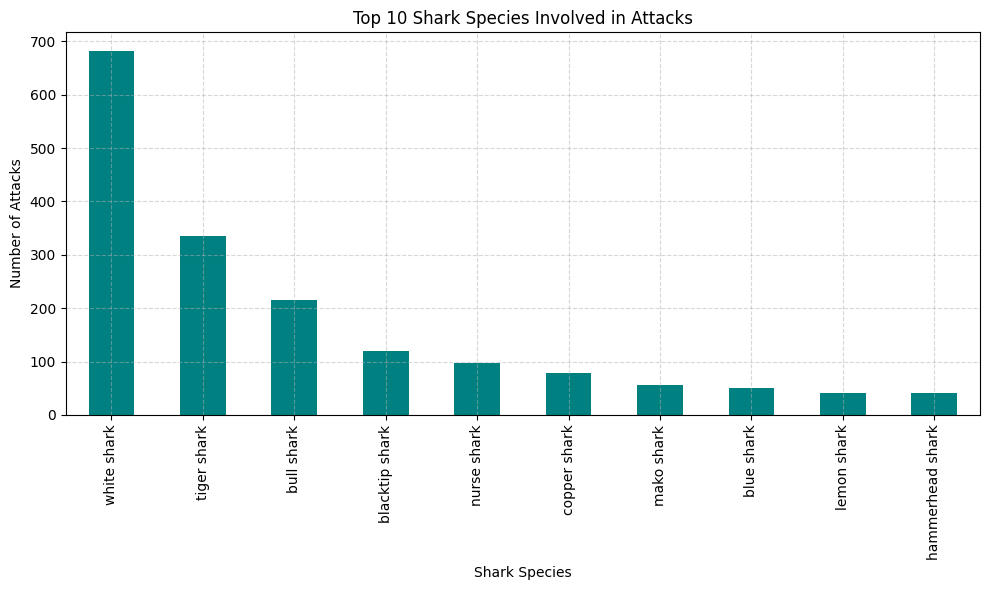

In [187]:
import matplotlib.pyplot as plt

# 1. Top 10 Shark Species Involved
fig1, ax1 = plt.subplots(figsize=(10, 6))
df['Species'].value_counts().head(10).plot(
    kind='bar',
    color='teal',
    ax=ax1,
    title='Top 10 Shark Species Involved in Attacks'
)
ax1.set_xlabel("Shark Species")
ax1.set_ylabel("Number of Attacks")
ax1.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
fig1.show()


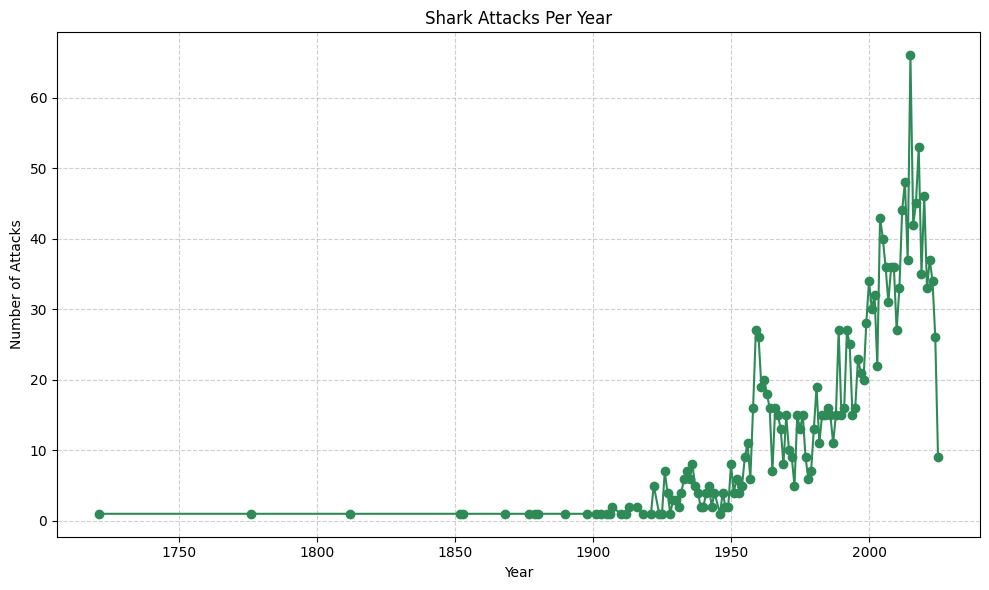

In [188]:
# Extract 'Year' from 'Date' column
df['Year'] = pd.to_datetime(df['Date'], errors='coerce').dt.year

# Line chart: number of attacks per year
fig, ax = plt.subplots(figsize=(10, 6))
df['Year'].value_counts().sort_index().plot(
    kind='line',
    marker='o',
    color='seagreen',
    title='Shark Attacks Per Year',
    ax=ax
)

ax.set_xlabel("Year")
ax.set_ylabel("Number of Attacks")
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


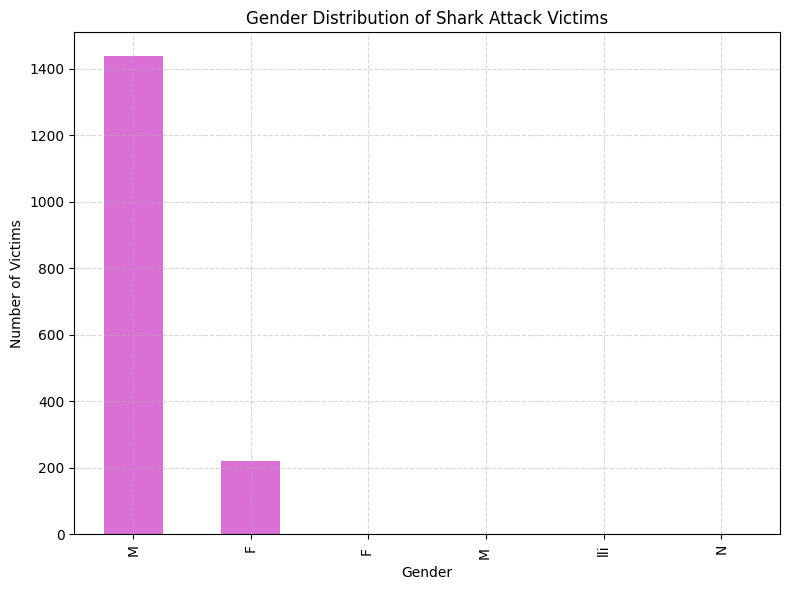

In [189]:
# Bar chart: number of male vs. female victims
fig, ax = plt.subplots(figsize=(8, 6))
df['Sex'].value_counts().plot(
    kind='bar',
    color='orchid',
    title='Gender Distribution of Shark Attack Victims',
    ax=ax
)

ax.set_xlabel("Gender")
ax.set_ylabel("Number of Victims")
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


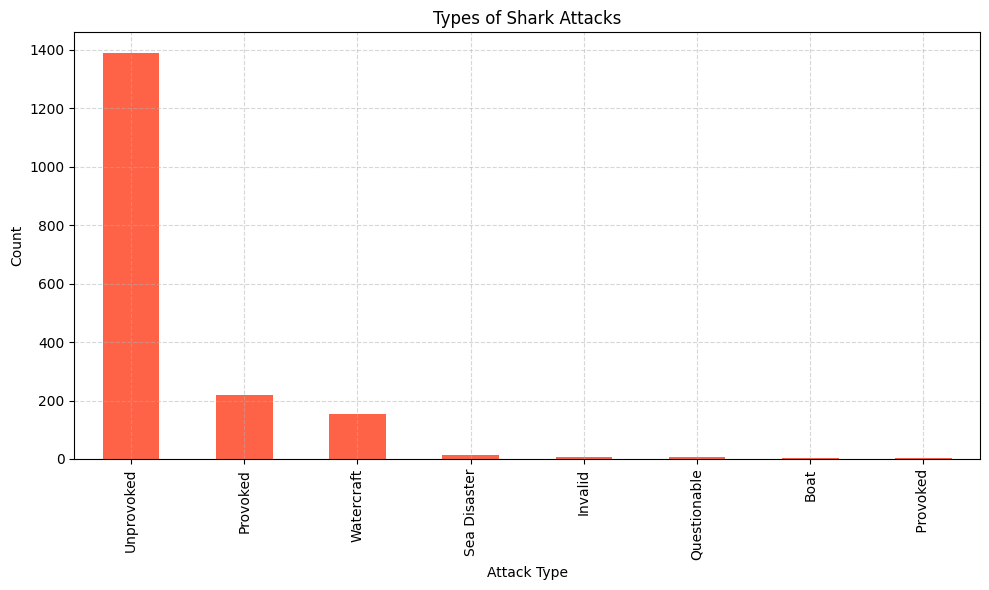

In [190]:
# Bar chart: unprovoked vs. questionable attacks
fig, ax = plt.subplots(figsize=(10, 6))
df['Type'].value_counts().plot(
    kind='bar',
    color='tomato',
    title='Types of Shark Attacks',
    ax=ax
)

ax.set_xlabel("Attack Type")
ax.set_ylabel("Count")
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


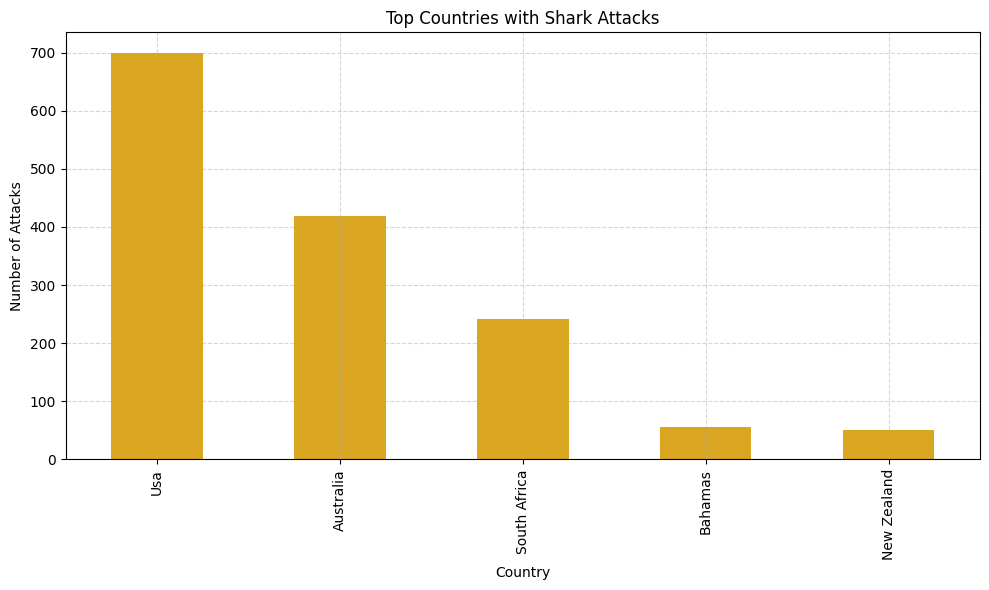

In [191]:
# Bar chart: top 5 countries with most attacks
fig, ax = plt.subplots(figsize=(10, 6))
df['Country'].str.title().value_counts().head(5).plot(
    kind='bar',
    color='goldenrod',
    title='Top Countries with Shark Attacks',
    ax=ax
)

ax.set_xlabel("Country")
ax.set_ylabel("Number of Attacks")
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Summary of Visualizations
To gain meaningful insights into the shark attack dataset, we conducted five targeted visualizations using key attributes: Date, Type, Country, Sex, and Species. These visualizations revealed several important patterns:

Top Shark Species Involved
    A bar chart was used to highlight the most frequently encountered shark species. The results indicated that certain species such as the white shark and bull shark were more commonly involved in incidents.

Shark Attacks Per Year
    A time-series line plot displayed the annual distribution of shark attacks, offering a view of trends over time and identifying peak years or unusual declines in reported cases.

Gender Distribution of Victims
This bar chart compared the number of male and female victims, shedding light on which gender was more frequently affected in reported attacks.

Type of Shark Attacks
    A categorical breakdown of attack types, such as Unprovoked or Questionable, showed which classifications were most common, helping to assess the nature of incidents.

Top Countries Affected
    A bar chart visualized the countries with the highest number of shark attacks, with Australia and the USA appearing prominently, pointing to geographic hotspots.